In [1]:
#coding: utf-8
import numpy as np
import pandas as pd

train_data = pd.read_csv("./train.csv")
train_lavel = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
test_lavel = pd.read_csv("./gender_submission.csv")

In [2]:
def name_classifier(name_df):
    name_class_df = pd.DataFrame(columns={'Miss','Mrs','Master','Mr'})
    
    for name in name_df:
        if 'Miss' in name:
            df = pd.DataFrame([[1,0,0,0]], columns={'Miss','Mrs','Master','Mr'})
        elif 'Mrs' in name:
            df = pd.DataFrame([[0,1,0,0]], columns={'Miss','Mrs','Master','Mr'})
        elif 'Master' in name:
            df = pd.DataFrame([[0,0,1,0]], columns={'Miss','Mrs','Master','Mr'})
        elif 'Mr' in name:
            df = pd.DataFrame([[0,0,0,1]], columns={'Miss','Mrs','Master','Mr'})
        else:
            df = pd.DataFrame([[0,0,0,0]], columns={'Miss','Mrs','Master','Mr'})
        name_class_df = name_class_df.append(df, ignore_index=True)

    return name_class_df

tn = train_data["Name"]
tnc = name_classifier(tn)
train_data = pd.concat((train_data, tnc), axis=1)
train_data = train_data.drop(['Name'], axis=1)
train_data['Age'] = train_data['Age'].interpolate()
train_data['Fare'] = train_data['Fare'].interpolate()
#print(train_data)

sn = test_data["Name"]
snc = name_classifier(sn)
test_data = pd.concat((test_data, snc), axis=1)
test_data = test_data.drop(['Name'], axis=1)
test_data['Age'] = test_data['Age'].interpolate()
test_data['Fare'] = test_data['Fare'].interpolate()
#print(test_data)

In [3]:
def cols_to_dummies(df):
    dummies = []
    cols = ['Pclass','Sex','Embarked']
    for col in cols:
        dummies.append(pd.get_dummies(df[col]))
    titanic_dummies = pd.concat(dummies, axis=1)
    df = pd.concat((df, titanic_dummies), axis=1)
    df = df.drop(cols, axis=1)
    return df

train_data = cols_to_dummies(train_data)
test_data = cols_to_dummies(test_data)

train_data.head(3)

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Miss,Mr,Master,Mrs,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0,0,1,1,0,0,0,1


In [4]:
def cabin_to_dummies(df_cabin):
    cabin_result = pd.DataFrame(columns={'Cabin'})
    
    for row in range(0, len(df_cabin)):
        df = df_cabin.iloc[row]
        if df is None:
            df = pd.DataFrame([[0]], columns={'Cabin'})
        else:
            df = pd.DataFrame([[1]], columns={'Cabin'})
        cabin_result = cabin_result.append(df, ignore_index=True)

    return cabin_result

#trc = train_data['Cabin']
#trc_df = cabin_to_dummies(trc)
#train_data = pd.concat((train_data, trc_df), axis=1)

#tec = test_data['Cabin']
#tec_df = cabin_to_dummies(tec)
#test_data = pd.concat((test_data, tec_df), axis=1)

#train_data.head(3)

ids = test_data["PassengerId"].values

cols = ['PassengerId','Ticket', 'Cabin', 'SibSp', 'Parch']
train_data = train_data.drop(cols, axis=1)
test_data = test_data.drop(cols, axis=1)

train_data = train_data.drop(['Survived'], axis=1)

train_data.head(3)

,Age,Fare,Miss,Mr,Master,Mrs,1,2,3,female,male,C,Q,S
0,22.0,7.2500,0,0,0,1,0,0,1,0,1,0,0,1
1,38.0,71.2833,0,1,0,0,1,0,0,1,0,1,0,0
2,26.0,7.9250,1,0,0,0,0,0,1,1,0,0,0,1


In [5]:
train_lavel = train_lavel['Survived'].values
#print(train_lavel)

test_lavel = test_lavel['Survived'].values
#print(test_lavel)


In [6]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

clf = ensemble.RandomForestClassifier(min_samples_split=40)
clf.fit(train_data, train_lavel)
clf.score(test_data, test_lavel)

0.88038277511961727

In [7]:
pred = clf.predict(test_data)
accuracy_score(np.ravel(test_lavel), pred)

0.88038277511961727

In [8]:
import csv
submit_file = open("./titanic_submit_RandomForestClassifier.csv", "w")
file_object = csv.writer(submit_file)
file_object.writerow(["PassengerId", "Survived"])
file_object.writerows(zip(ids, pred))
submit_file.close()

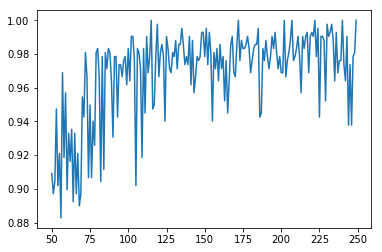

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

accuracy = []
i_range = []
for i in range(50, 250):
    clf = ensemble.RandomForestClassifier(min_samples_split=i)
    clf.fit(train_data, train_lavel)
    pred = clf.predict(test_data)
    acc = accuracy_score(np.ravel(test_lavel), pred)
    accuracy.append(acc)
    i_range.append(i)

#print(accuracy)
x = i_range
y = accuracy
plt.plot(x, y)